In [31]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
%matplotlib inline

In [32]:
# metadata
file_path = '/Users/renata.m/QIIME2/qiime2-final_analysis-silva_abx/fondue-output/shannon_sra_metadata.tsv'
shannon_metadata_df = pd.read_csv(file_path, sep='\t')

Average alpha diversity within first week (Day 0-7) for CDI patients: 4.1199
Average alpha diversity within first week (Day 0-7) for non-CDI patients: 4.8960
Mann-Whitney U test p-value: 0.0000


/var/folders/6q/6nzfxmt176v8n102ymkb7yw80000gn/T/ipykernel_36863/4090582789.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Average Shannon Entropy', data=combined_data, palette=color_mapping)


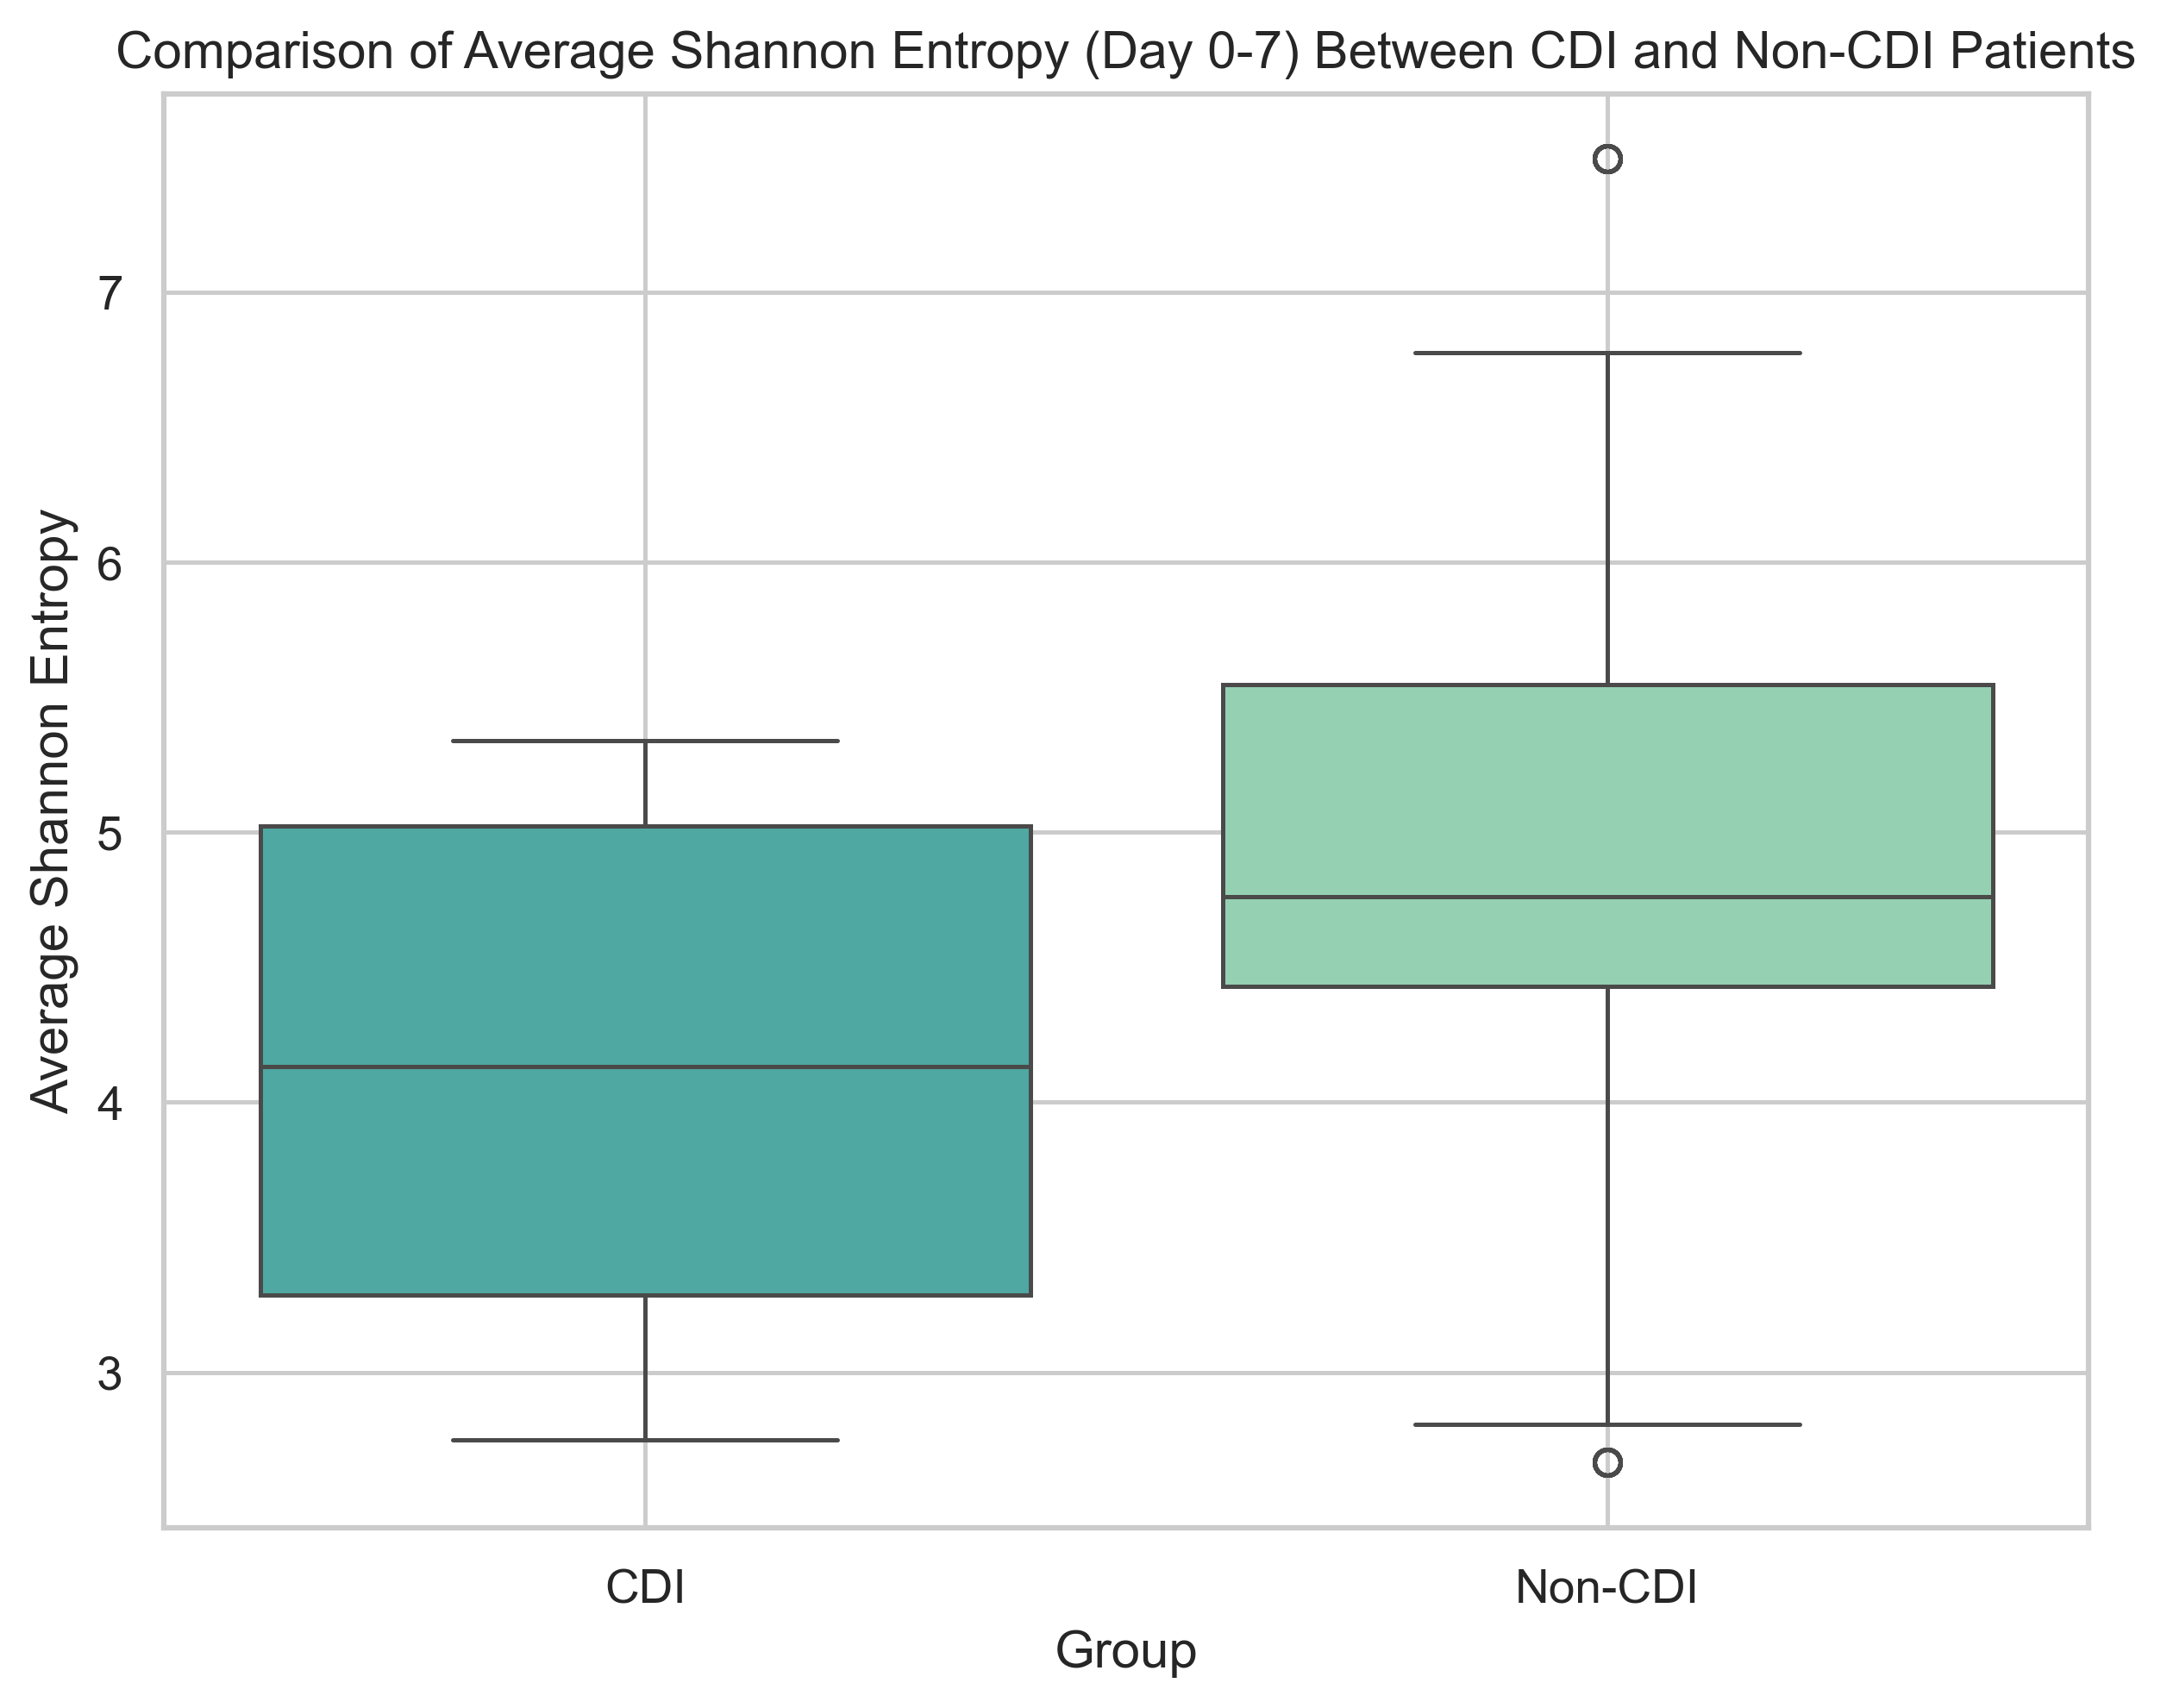

In [34]:
# Calculate average alpha diversity within the first week for patients
def calculate_average_alpha_diversity_first_week(patients):
    avg_alpha_diversity = []
    for idx, row in patients.iterrows():
        patient_id = row['Patient_ID']
        
        alpha_diversity_first_week = shannon_metadata_df[(shannon_metadata_df['Patient_ID'] == patient_id) &
                                           (shannon_metadata_df['SampleDayRelativeToD1Chemo'] >= 0) &
                                           (shannon_metadata_df['SampleDayRelativeToD1Chemo'] <= 7)]['shannon_entropy']
        if len(alpha_diversity_first_week) > 0:
            avg_alpha_diversity.append(alpha_diversity_first_week.mean())
    return pd.Series(avg_alpha_diversity)

#CDI patients and non-CDI patients
cdi_patients = shannon_metadata_df[shannon_metadata_df['CDiff_infection'] == True]
non_cdi_patients = shannon_metadata_df[shannon_metadata_df['CDiff_infection'] == False]

# Calculate average alpha diversity within the first week 
avg_alpha_diversity_cdi = calculate_average_alpha_diversity_first_week(cdi_patients)
avg_alpha_diversity_non_cdi = calculate_average_alpha_diversity_first_week(non_cdi_patients)

# Create a box plot with Seaborn
palette = sns.color_palette("mako_r", 6)
color_mapping = {
    'Non-CDI': palette[0],       
    'CDI': palette[1],   

}

# Mann-Whitney U test 
if len(avg_alpha_diversity_cdi) > 0 and len(avg_alpha_diversity_non_cdi) > 0:
    statistic, p_value = mannwhitneyu(avg_alpha_diversity_cdi, avg_alpha_diversity_non_cdi, alternative='less')

    # Output results
    print(f"Average alpha diversity within first week (Day 0-7) for CDI patients: {avg_alpha_diversity_cdi.mean():.4f}")
    print(f"Average alpha diversity within first week (Day 0-7) for non-CDI patients: {avg_alpha_diversity_non_cdi.mean():.4f}")
    print(f"Mann-Whitney U test p-value: {p_value:.4f}")
    
    # Combine the data for plotting
    combined_data = pd.DataFrame({
        'Average Shannon Entropy': pd.concat([avg_alpha_diversity_cdi, avg_alpha_diversity_non_cdi]),
        'Group': ['CDI'] * len(avg_alpha_diversity_cdi) + ['Non-CDI'] * len(avg_alpha_diversity_non_cdi)
    })

    # Boxplot
    sns.set(style="whitegrid")
    plt.rcParams['figure.dpi'] = 360    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y='Average Shannon Entropy', data=combined_data, palette=color_mapping)

    plt.title('Comparison of Average Shannon Entropy (Day 0-7) Between CDI and Non-CDI Patients')
    plt.xlabel('Group')
    plt.ylabel('Average Shannon Entropy')
    plt.grid(True)

    plt.show()

/var/folders/6q/6nzfxmt176v8n102ymkb7yw80000gn/T/ipykernel_36863/3102564119.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(x='SampleDayRelativeToD1Chemo', y='shannon_entropy', hue='CDiff_infection', data=shannon_metadata_df, palette=palette, style='CDiff_infection')


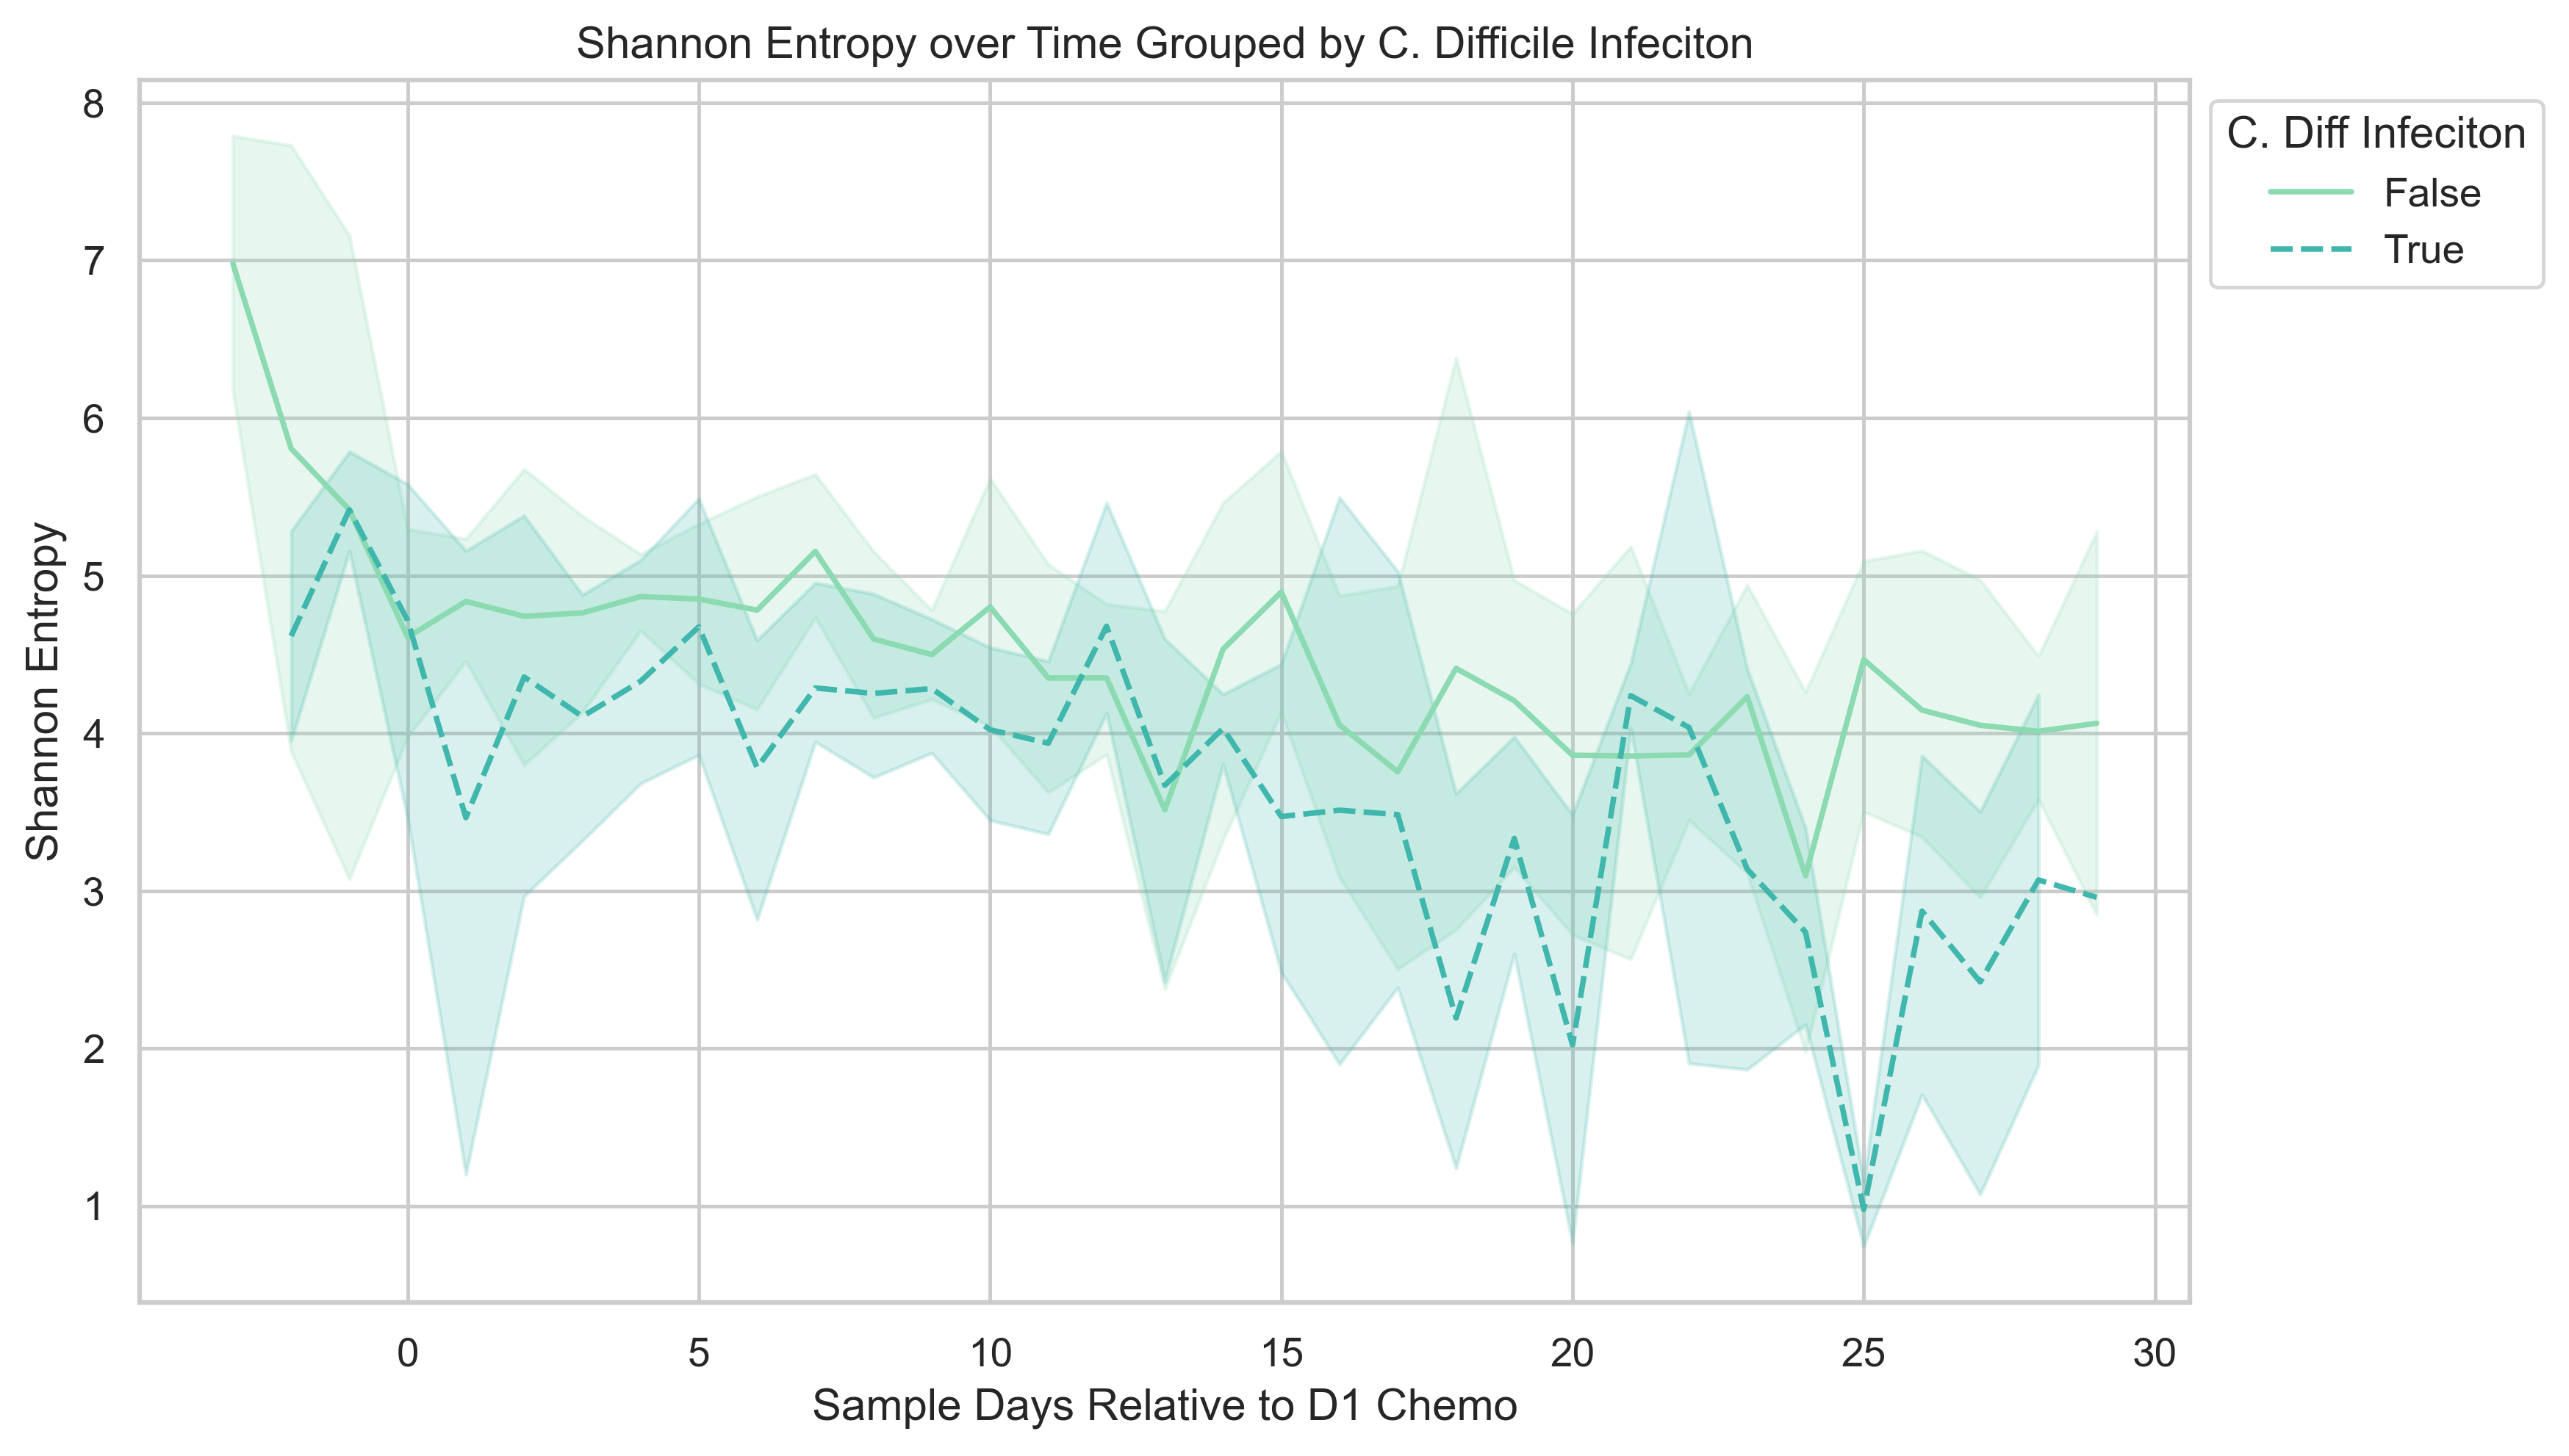

In [35]:
palette = sns.color_palette("mako_r", 6)
color_mapping = {
    'CDI': palette[0],        # CDI maps to the first color in the palette
    'Non-CDI': palette[1],    # Non-CDI maps to the second color in the palette
    # Add more mappings if needed
}
# Example: Grouping by Disease_Phase
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x='SampleDayRelativeToD1Chemo', y='shannon_entropy', hue='CDiff_infection', data=shannon_metadata_df, palette=palette, style='CDiff_infection')
plt.xlabel('Sample Days Relative to D1 Chemo')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy over Time Grouped by C. Difficile Infeciton')
plt.legend(title='C. Diff Infeciton', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()